In [73]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import random
import os
os.getcwd()

'C:\\Users\\mandapm\\Documents\\CS Class\\assgn4'

In [74]:
#changing working directory to point to file location
os.chdir('C:\\Users\\mandapm\\Documents\\CS Class\\assgn4')

In [75]:
# function to plot images
def plot_image(pixels: np.array):
    plt.imshow(pixels.reshape((28, 28)), cmap='winter')
    plt.show()

In [76]:
# function for 3 initializations: Random, K-means++ , known initialization
def initialize(init,X,k,Y):
    mu = np.zeros((k,784))
    if init ==1: # ten random data points 
        sequence = [i for i in range(10000)]
        subset = random.sample(sequence, 10)
        mu_init = X[subset,:]
    elif init ==2: #ten points using k-means++
        sequence = [i for i in range(10000)]
        subset = random.sample(sequence, 1)
        for i in range(k):
            if i ==0:
                    j=subset
            mu[i]=X[j,:]
            dist = np.sum((X-mu[i])**2,axis=1)
            j = np.argmax(dist.reshape(-1,1),axis=0)
        mu_init = mu
    else: # datapoint chosen from each labeled class
        subset = np.zeros((k,784))
        for l in range(k):
            ind = np.random.randint(low=0, high=500, size=1)
            selected_y = X[Y[:,0]==l]
            subset[l] = selected_y[ind]
        mu_init = subset
    return mu_init

In [77]:
# function to assign a point to cluster mean
def kmeans_assignment(mu,X,k):
    z = np.zeros((len(X[:,0]),k))
    for i in range(len(X[:,0])):
        x1 = np.array(X[i],dtype = 'int')
        dist = np.zeros(k)
        for j in range(k):
            x2 = np.array(mu[j])
            dist[j]= np.sqrt(np.sum((x1-x2)**2))
        z[i,np.argmin(dist)]=1
    return z

# function to update mean after assigning all points to their clusters.
def kmeans_meanupdate(z,k,X):
    N = np.sum(z.T,axis = 1).reshape(1,k)
    mu_new = np.zeros((k,784))
    a = np.dot(z.T,X)
    for l in range(k):
        mu_new[l] = a[l]/N[0,l]
    return mu_new 

# function to iterate and perform K-means clustering until convergence
def kmeans_iterations(mu,X,k,i=0,z=0):
    if i == 0:
        z = kmeans_assignment(mu,X,k)
        mu = kmeans_meanupdate(z,k,X)
    z_new = kmeans_assignment(mu,X,k)
    mu_new = np.around(kmeans_meanupdate(z_new,k,X),decimals =1)
    print('.', end ="")
    if np.array_equal(z_new, z):
        if np.array_equal(mu_new,mu):
            print('\n',i,' iterations, ',end = '')
            J=0
            fig, ax = plt.subplots(int(k/int(k/2)),int(k/2))
            for i, ax in enumerate(ax.flatten()):
                 ind = z_new[:,i]==1
                 J += np.sum((X[ind]-mu_new[i])**2)
                 X_K = X[ind]
                 plottable_image = np.reshape(X_K[9,0:784], (28, 28))
                 ax.imshow(plottable_image, cmap='winter')
            print('J = ',J)
            print('Few randomly chosen representatives from data for each class')
            plt.show()             
    else:
        kmeans_iterations(mu=mu_new,X=X,k=k,i=i+1,z=z_new)
    return mu_new

Random Initialization
...................................................
 50  iterations, J =  25318371989.86999
Few randomly chosen representatives from data for each class


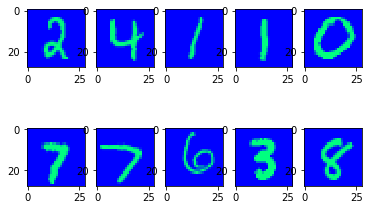

Cheating Initialization
....................................................
 51  iterations, J =  25465382391.809994
Few randomly chosen representatives from data for each class


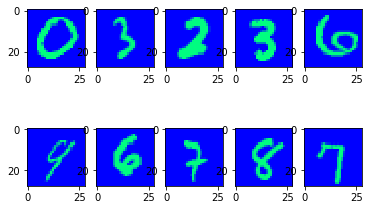

For 3 clusters and K-means++ initialization
.........................
 24  iterations, J =  30394431825.610016
Few randomly chosen representatives from data for each class


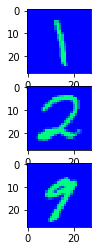

Cluster means images


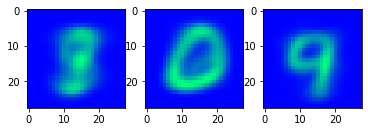

In [78]:
# function to use KNN with 3 different initializations on MNIST dataset images 
def problem2():
    test_images_file = open('t10k-images-idx3-ubyte','rb')
    test_images = test_images_file.read()
    test_images_file.close()
        
    test_labels_file = open('t10k-labels-idx1-ubyte','rb')
    test_labels = test_labels_file.read()
    test_labels_file.close()

    test_images = bytearray(test_images)
    test_labels = bytearray(test_labels)
    
    test_images = test_images[16:]
    test_images = np.array(test_images)
    X = test_images.reshape(10000,784) 
    X = np.array(X,dtype = 'int').reshape(10000,784)
    
    test_labels = test_labels[8:]
    test_labels = np.array(test_labels)
    Y = test_labels.reshape(10000,1)
    
    print('Random Initialization')
    mu_init1 = initialize(init = 1,X=X,k=10,Y=Y) 
    kmeans_iterations(mu = mu_init1,X=X,k=10)
    #print('k-means++ initialization')
    #mu_init2 =  initialize(init = 2,X=X,k=10,Y=Y)
    #kmeans_iterations(mu = mu_init2,X=X,k=10)
    print('Cheating Initialization')
    mu_init3 = initialize(init = 3,X=X,k=10,Y=Y)
    kmeans_iterations(mu = mu_init3,X=X,k=10)
    print('For 3 clusters and K-means++ initialization')
    mu_init4 = initialize(init = 2,X=X,k=3,Y=Y)
    mu_final4 = kmeans_iterations(mu = mu_init4,X=X,k=3)
    fig, ax = plt.subplots(1,3)
    print('Cluster means images')
    for i, ax in enumerate(ax.flatten()):
                 plottable_image = np.reshape(mu_final4[i,0:784], (28, 28))
                 ax.imshow(plottable_image, cmap='winter')
    plt.show()
    
problem2()